In [1]:
pip install tensorflow matplotlib opencv-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

2023-08-20 23:16:15.493210: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 23:16:15.942900: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 23:16:15.945711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 23:16:18.094074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
os.path.join('happy_faces')

'happy_faces'

In [4]:
os.listdir()

['data', 'face_sorter.ipynb', '.ipynb_checkpoints']

In [5]:
##################   Setting Out of Memory error avoidance #########
# cpus = tf.config.experimental.list_physical_devices('CPU')
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
data_dir = 'data'
image_exts = ['jpeg','jpg','bmp','png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image is not in the list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {image_path}')

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 318 files belonging to 2 classes.


In [9]:
###### Get a batch from iterator
data_iterator = data.as_numpy_iterator()

2023-08-20 23:16:37.404915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [318]
	 [[{{node Placeholder/_4}}]]
2023-08-20 23:16:37.405742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [318]
	 [[{{node Placeholder/_4}}]]


In [10]:
batch = data_iterator.next()

2023-08-20 23:16:37.560158: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58271400 exceeds 10% of free system memory.
2023-08-20 23:16:37.821605: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 63078912 exceeds 10% of free system memory.
2023-08-20 23:16:38.934625: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132153153 exceeds 10% of free system memory.
2023-08-20 23:16:39.457088: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 59885568 exceeds 10% of free system memory.
2023-08-20 23:16:39.573091: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 59101500 exceeds 10% of free system memory.


In [11]:
batch[0].shape

(32, 256, 256, 3)

In [12]:
###### Class 1 = Sad people
###### Class 0 = Happy people
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

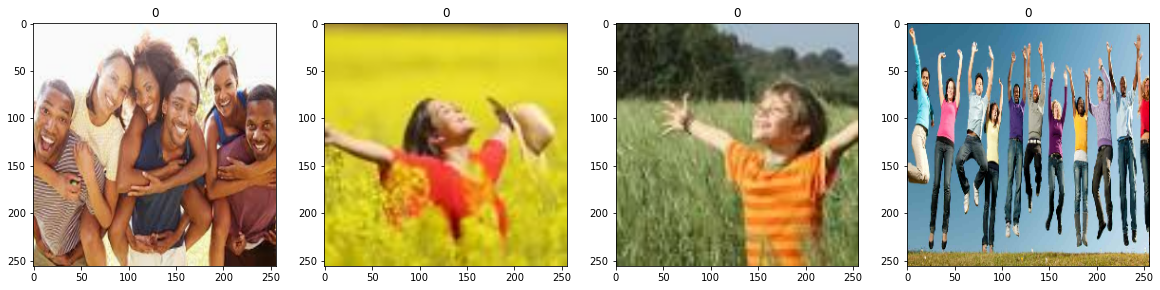

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
scaled = batch[0] / 255

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()[0].max()

2023-08-20 23:16:42.616226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [318]
	 [[{{node Placeholder/_4}}]]
2023-08-20 23:16:42.616931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [318]
	 [[{{node Placeholder/_0}}]]


1.0